# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

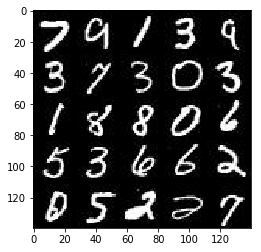

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

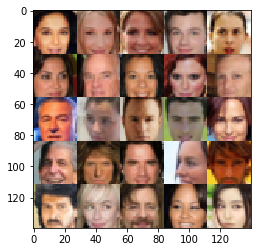

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [70]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    
    image_tensor = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), 
                                  name='input_real')
    z_tensor = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32)
    return image_tensor, z_tensor, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [71]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(0.2*x1, x1)

        x2 = tf.layers.conv2d(relu1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(x2, training=True)
        relu2 = tf.maximum(0.2 * bn2, bn2)

        x3 = tf.layers.conv2d(relu2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(x3, training=True)
        relu3 = tf.maximum(0.2 * bn3, bn3)
        
        flat = tf.reshape(relu3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
    
    return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [72]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        x1 = tf.layers.dense(z, 7*7*512)
        
        x1 = tf.reshape(x1, (-1, 7, 7, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(0.2 * x1, x1)
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(0.2 * x2, x2)
        
        logits = tf.layers.conv2d_transpose(x2, out_channel_dim, 5, strides=2, padding='same')
        
        out = tf.tanh(logits)
    
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [73]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train=True)
    
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,
                                                labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [74]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [75]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [81]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model    
    time_step = 0
    
    image_channels = 0
    if data_image_mode == "RGB":
        image_channels = 3
    else:
        image_channels = 1
        
    input_real, input_z, lr = model_inputs(data_shape[1], data_shape[2], image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                time_step += 1

                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                batch_images = batch_images * 2
                
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images})   
                
                if time_step % 10 == 0:
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})   
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                if time_step % 100 == 0:
                    sample_z = tf.random_uniform([10, z_dim], -1, 1, dtype=tf.float32)
                    show_generator_output(sess, 10, sample_z , image_channels, data_image_mode)
                                    

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 1.6597... Generator Loss: 0.3245
Epoch 1/2... Discriminator Loss: 1.1099... Generator Loss: 0.6604
Epoch 1/2... Discriminator Loss: 1.3136... Generator Loss: 0.6225
Epoch 1/2... Discriminator Loss: 1.4554... Generator Loss: 0.5654
Epoch 1/2... Discriminator Loss: 0.9163... Generator Loss: 0.8489
Epoch 1/2... Discriminator Loss: 0.6273... Generator Loss: 1.3003
Epoch 1/2... Discriminator Loss: 0.9254... Generator Loss: 0.8069
Epoch 1/2... Discriminator Loss: 1.0330... Generator Loss: 0.7616
Epoch 1/2... Discriminator Loss: 0.8316... Generator Loss: 2.3868
Epoch 1/2... Discriminator Loss: 0.9109... Generator Loss: 1.3410


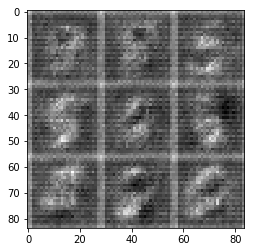

Epoch 1/2... Discriminator Loss: 1.4403... Generator Loss: 0.3485
Epoch 1/2... Discriminator Loss: 1.1509... Generator Loss: 0.5265
Epoch 1/2... Discriminator Loss: 0.8410... Generator Loss: 1.2835
Epoch 1/2... Discriminator Loss: 1.0300... Generator Loss: 0.7745
Epoch 1/2... Discriminator Loss: 1.2746... Generator Loss: 0.4550
Epoch 1/2... Discriminator Loss: 1.0347... Generator Loss: 1.6922
Epoch 1/2... Discriminator Loss: 0.9926... Generator Loss: 1.7709
Epoch 1/2... Discriminator Loss: 1.0247... Generator Loss: 0.6639
Epoch 1/2... Discriminator Loss: 0.7913... Generator Loss: 1.3788
Epoch 1/2... Discriminator Loss: 0.9745... Generator Loss: 0.9385


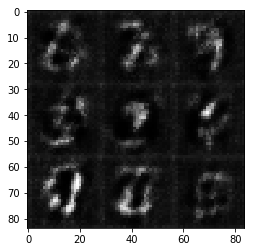

Epoch 1/2... Discriminator Loss: 1.0876... Generator Loss: 0.5942
Epoch 1/2... Discriminator Loss: 0.8428... Generator Loss: 1.3526
Epoch 1/2... Discriminator Loss: 0.9967... Generator Loss: 0.6244
Epoch 1/2... Discriminator Loss: 0.8062... Generator Loss: 0.9811
Epoch 1/2... Discriminator Loss: 1.3969... Generator Loss: 0.3609
Epoch 1/2... Discriminator Loss: 0.8617... Generator Loss: 1.0276
Epoch 1/2... Discriminator Loss: 0.9235... Generator Loss: 1.9949
Epoch 1/2... Discriminator Loss: 0.8192... Generator Loss: 1.2092
Epoch 1/2... Discriminator Loss: 0.9788... Generator Loss: 1.1660
Epoch 1/2... Discriminator Loss: 0.7575... Generator Loss: 1.0052


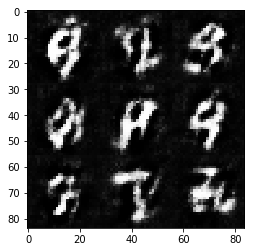

Epoch 1/2... Discriminator Loss: 1.1368... Generator Loss: 0.4973
Epoch 1/2... Discriminator Loss: 0.7913... Generator Loss: 0.9938
Epoch 1/2... Discriminator Loss: 0.8178... Generator Loss: 0.7916
Epoch 1/2... Discriminator Loss: 0.8439... Generator Loss: 0.8336
Epoch 1/2... Discriminator Loss: 0.5508... Generator Loss: 1.2409
Epoch 1/2... Discriminator Loss: 0.8880... Generator Loss: 0.7687
Epoch 1/2... Discriminator Loss: 0.6402... Generator Loss: 1.0865
Epoch 1/2... Discriminator Loss: 0.6905... Generator Loss: 1.2165
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 1.4024
Epoch 1/2... Discriminator Loss: 0.7784... Generator Loss: 0.9060


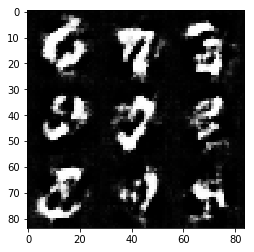

Epoch 1/2... Discriminator Loss: 0.8785... Generator Loss: 0.7377
Epoch 1/2... Discriminator Loss: 1.3580... Generator Loss: 0.3974
Epoch 1/2... Discriminator Loss: 0.9232... Generator Loss: 0.6910
Epoch 1/2... Discriminator Loss: 0.6535... Generator Loss: 1.1578
Epoch 1/2... Discriminator Loss: 0.5850... Generator Loss: 1.1879
Epoch 1/2... Discriminator Loss: 0.8293... Generator Loss: 1.7387
Epoch 1/2... Discriminator Loss: 1.0565... Generator Loss: 0.5184
Epoch 1/2... Discriminator Loss: 0.6500... Generator Loss: 1.0756
Epoch 1/2... Discriminator Loss: 0.5982... Generator Loss: 1.4886
Epoch 1/2... Discriminator Loss: 0.8168... Generator Loss: 2.1643


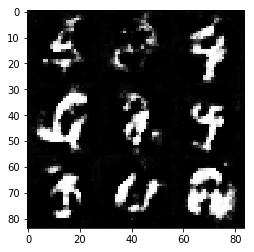

Epoch 1/2... Discriminator Loss: 0.4358... Generator Loss: 1.4492
Epoch 1/2... Discriminator Loss: 0.7143... Generator Loss: 0.9608
Epoch 1/2... Discriminator Loss: 0.8563... Generator Loss: 0.7677
Epoch 1/2... Discriminator Loss: 0.4844... Generator Loss: 1.4645
Epoch 1/2... Discriminator Loss: 0.5717... Generator Loss: 1.2687
Epoch 1/2... Discriminator Loss: 0.5611... Generator Loss: 2.2674
Epoch 1/2... Discriminator Loss: 0.6203... Generator Loss: 1.4898
Epoch 1/2... Discriminator Loss: 0.6896... Generator Loss: 0.9933
Epoch 1/2... Discriminator Loss: 0.6480... Generator Loss: 1.1093
Epoch 1/2... Discriminator Loss: 0.6435... Generator Loss: 2.4004


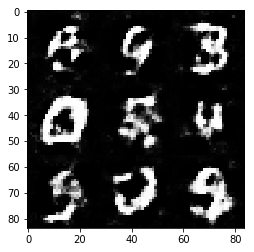

Epoch 1/2... Discriminator Loss: 0.4651... Generator Loss: 1.3693
Epoch 1/2... Discriminator Loss: 0.5675... Generator Loss: 1.9263
Epoch 1/2... Discriminator Loss: 0.5937... Generator Loss: 2.4606
Epoch 1/2... Discriminator Loss: 0.4690... Generator Loss: 1.7862
Epoch 1/2... Discriminator Loss: 0.9765... Generator Loss: 0.7014
Epoch 1/2... Discriminator Loss: 0.5742... Generator Loss: 2.3936
Epoch 1/2... Discriminator Loss: 0.9677... Generator Loss: 0.6827
Epoch 1/2... Discriminator Loss: 0.7896... Generator Loss: 0.8529
Epoch 1/2... Discriminator Loss: 0.8753... Generator Loss: 0.7684
Epoch 1/2... Discriminator Loss: 0.4741... Generator Loss: 1.4605


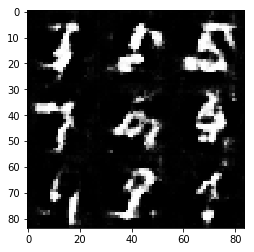

Epoch 1/2... Discriminator Loss: 0.5149... Generator Loss: 1.2168
Epoch 1/2... Discriminator Loss: 0.8420... Generator Loss: 0.7944
Epoch 1/2... Discriminator Loss: 0.5297... Generator Loss: 2.3777
Epoch 1/2... Discriminator Loss: 0.6894... Generator Loss: 0.9881
Epoch 1/2... Discriminator Loss: 0.4871... Generator Loss: 1.5803
Epoch 1/2... Discriminator Loss: 0.6874... Generator Loss: 1.0227
Epoch 1/2... Discriminator Loss: 0.5034... Generator Loss: 1.9466
Epoch 1/2... Discriminator Loss: 0.8616... Generator Loss: 0.9420
Epoch 1/2... Discriminator Loss: 0.5946... Generator Loss: 1.4139
Epoch 1/2... Discriminator Loss: 1.3632... Generator Loss: 0.3805


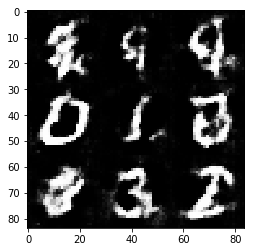

Epoch 1/2... Discriminator Loss: 1.0082... Generator Loss: 0.5696
Epoch 1/2... Discriminator Loss: 0.5214... Generator Loss: 1.3886
Epoch 1/2... Discriminator Loss: 0.6876... Generator Loss: 1.0563
Epoch 1/2... Discriminator Loss: 0.8844... Generator Loss: 2.5567
Epoch 1/2... Discriminator Loss: 0.8763... Generator Loss: 2.6048
Epoch 1/2... Discriminator Loss: 1.2014... Generator Loss: 0.5037
Epoch 1/2... Discriminator Loss: 0.4974... Generator Loss: 1.4408
Epoch 1/2... Discriminator Loss: 0.7133... Generator Loss: 1.2898
Epoch 1/2... Discriminator Loss: 0.5719... Generator Loss: 1.2517
Epoch 1/2... Discriminator Loss: 0.6203... Generator Loss: 1.3013


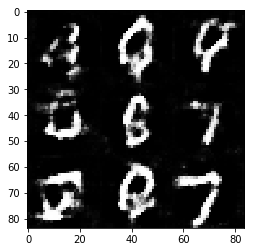

Epoch 1/2... Discriminator Loss: 0.7403... Generator Loss: 1.7826
Epoch 1/2... Discriminator Loss: 0.5516... Generator Loss: 1.5134
Epoch 1/2... Discriminator Loss: 1.0736... Generator Loss: 0.6551
Epoch 1/2... Discriminator Loss: 0.9271... Generator Loss: 0.8145
Epoch 1/2... Discriminator Loss: 1.2490... Generator Loss: 0.4528
Epoch 1/2... Discriminator Loss: 0.5888... Generator Loss: 1.6217
Epoch 1/2... Discriminator Loss: 0.8960... Generator Loss: 1.3228
Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 1.0617
Epoch 1/2... Discriminator Loss: 1.1512... Generator Loss: 0.4975
Epoch 1/2... Discriminator Loss: 0.6055... Generator Loss: 1.2372


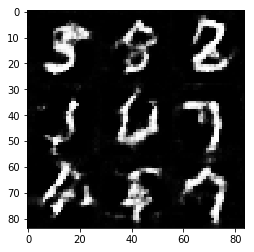

Epoch 1/2... Discriminator Loss: 0.5656... Generator Loss: 1.8337
Epoch 1/2... Discriminator Loss: 0.6800... Generator Loss: 1.1911
Epoch 1/2... Discriminator Loss: 0.6408... Generator Loss: 1.0350
Epoch 1/2... Discriminator Loss: 0.5707... Generator Loss: 1.3585
Epoch 1/2... Discriminator Loss: 0.7687... Generator Loss: 1.2687
Epoch 1/2... Discriminator Loss: 0.7164... Generator Loss: 0.8986
Epoch 1/2... Discriminator Loss: 1.0812... Generator Loss: 0.5607
Epoch 1/2... Discriminator Loss: 0.8511... Generator Loss: 2.2277
Epoch 1/2... Discriminator Loss: 1.1618... Generator Loss: 0.5084
Epoch 1/2... Discriminator Loss: 1.1950... Generator Loss: 0.5032


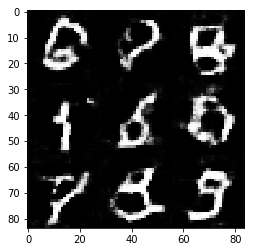

Epoch 1/2... Discriminator Loss: 0.7544... Generator Loss: 1.0638
Epoch 1/2... Discriminator Loss: 1.4022... Generator Loss: 2.9442
Epoch 1/2... Discriminator Loss: 0.9723... Generator Loss: 0.6626
Epoch 1/2... Discriminator Loss: 0.6286... Generator Loss: 1.5469
Epoch 1/2... Discriminator Loss: 0.6706... Generator Loss: 1.1963
Epoch 1/2... Discriminator Loss: 0.8465... Generator Loss: 0.9531
Epoch 1/2... Discriminator Loss: 0.5263... Generator Loss: 1.5112
Epoch 1/2... Discriminator Loss: 0.9976... Generator Loss: 2.6640
Epoch 1/2... Discriminator Loss: 0.5821... Generator Loss: 1.6798
Epoch 1/2... Discriminator Loss: 0.8261... Generator Loss: 0.8827


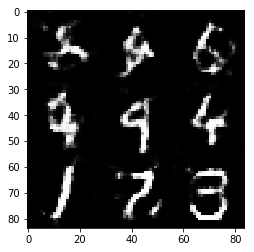

Epoch 1/2... Discriminator Loss: 0.6064... Generator Loss: 1.3078
Epoch 1/2... Discriminator Loss: 1.2394... Generator Loss: 0.4575
Epoch 1/2... Discriminator Loss: 1.0883... Generator Loss: 0.5260
Epoch 1/2... Discriminator Loss: 0.5197... Generator Loss: 1.3324
Epoch 1/2... Discriminator Loss: 0.7205... Generator Loss: 0.8831
Epoch 1/2... Discriminator Loss: 0.8609... Generator Loss: 0.8577
Epoch 1/2... Discriminator Loss: 0.7674... Generator Loss: 1.1972
Epoch 1/2... Discriminator Loss: 0.6643... Generator Loss: 1.6014
Epoch 1/2... Discriminator Loss: 0.6843... Generator Loss: 1.5355
Epoch 1/2... Discriminator Loss: 0.6286... Generator Loss: 1.1623


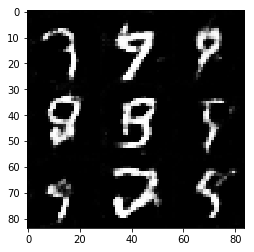

Epoch 1/2... Discriminator Loss: 1.1370... Generator Loss: 0.5611
Epoch 1/2... Discriminator Loss: 0.9663... Generator Loss: 0.7189
Epoch 1/2... Discriminator Loss: 0.7714... Generator Loss: 1.2957
Epoch 1/2... Discriminator Loss: 0.9272... Generator Loss: 0.6862
Epoch 1/2... Discriminator Loss: 1.1185... Generator Loss: 0.5521
Epoch 1/2... Discriminator Loss: 0.8339... Generator Loss: 0.8302
Epoch 1/2... Discriminator Loss: 0.8402... Generator Loss: 1.6059
Epoch 1/2... Discriminator Loss: 0.6574... Generator Loss: 1.0571
Epoch 1/2... Discriminator Loss: 1.1981... Generator Loss: 0.4769
Epoch 1/2... Discriminator Loss: 0.8305... Generator Loss: 0.7686


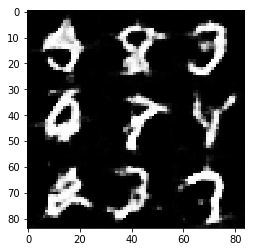

Epoch 1/2... Discriminator Loss: 0.6454... Generator Loss: 1.4289
Epoch 1/2... Discriminator Loss: 0.6650... Generator Loss: 1.0004
Epoch 1/2... Discriminator Loss: 0.6076... Generator Loss: 1.2178
Epoch 1/2... Discriminator Loss: 1.0516... Generator Loss: 0.6332
Epoch 1/2... Discriminator Loss: 0.7396... Generator Loss: 0.8380
Epoch 1/2... Discriminator Loss: 0.5360... Generator Loss: 1.7326
Epoch 1/2... Discriminator Loss: 0.6052... Generator Loss: 1.2499
Epoch 1/2... Discriminator Loss: 0.7878... Generator Loss: 0.8836
Epoch 1/2... Discriminator Loss: 0.6510... Generator Loss: 1.3041
Epoch 1/2... Discriminator Loss: 0.7042... Generator Loss: 0.9329


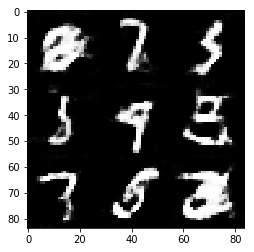

KeyboardInterrupt: 

In [80]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 0.6160
Epoch 1/1... Discriminator Loss: 1.1998... Generator Loss: 0.6365
Epoch 1/1... Discriminator Loss: 0.9721... Generator Loss: 0.6772
Epoch 1/1... Discriminator Loss: 0.6531... Generator Loss: 0.9910
Epoch 1/1... Discriminator Loss: 0.4461... Generator Loss: 1.3380
Epoch 1/1... Discriminator Loss: 0.6363... Generator Loss: 1.0153
Epoch 1/1... Discriminator Loss: 1.6171... Generator Loss: 0.2591
Epoch 1/1... Discriminator Loss: 1.2046... Generator Loss: 1.5917
Epoch 1/1... Discriminator Loss: 1.3943... Generator Loss: 0.5201
Epoch 1/1... Discriminator Loss: 0.9916... Generator Loss: 0.8962


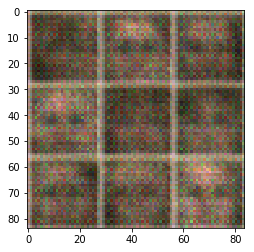

Epoch 1/1... Discriminator Loss: 1.2855... Generator Loss: 1.5228
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 0.8629
Epoch 1/1... Discriminator Loss: 1.4282... Generator Loss: 0.4902
Epoch 1/1... Discriminator Loss: 1.1818... Generator Loss: 0.6342
Epoch 1/1... Discriminator Loss: 1.2813... Generator Loss: 0.7285
Epoch 1/1... Discriminator Loss: 1.3572... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 0.4527
Epoch 1/1... Discriminator Loss: 0.9372... Generator Loss: 1.0923
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 0.7452
Epoch 1/1... Discriminator Loss: 0.9618... Generator Loss: 1.0115


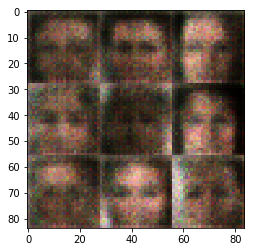

Epoch 1/1... Discriminator Loss: 0.8876... Generator Loss: 0.8560
Epoch 1/1... Discriminator Loss: 1.0446... Generator Loss: 1.4566
Epoch 1/1... Discriminator Loss: 1.2346... Generator Loss: 0.6418
Epoch 1/1... Discriminator Loss: 1.0178... Generator Loss: 0.9644
Epoch 1/1... Discriminator Loss: 1.2513... Generator Loss: 0.6975
Epoch 1/1... Discriminator Loss: 1.2293... Generator Loss: 0.6742
Epoch 1/1... Discriminator Loss: 1.0663... Generator Loss: 0.9272
Epoch 1/1... Discriminator Loss: 1.1547... Generator Loss: 0.6575
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.8260
Epoch 1/1... Discriminator Loss: 1.0892... Generator Loss: 1.1082


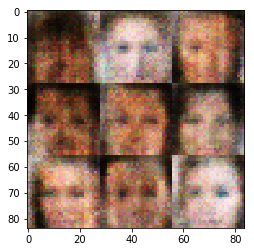

Epoch 1/1... Discriminator Loss: 1.2731... Generator Loss: 0.4859
Epoch 1/1... Discriminator Loss: 0.8547... Generator Loss: 0.9916
Epoch 1/1... Discriminator Loss: 1.4144... Generator Loss: 0.4136
Epoch 1/1... Discriminator Loss: 0.8896... Generator Loss: 0.8960
Epoch 1/1... Discriminator Loss: 0.8573... Generator Loss: 0.9939
Epoch 1/1... Discriminator Loss: 1.5918... Generator Loss: 0.3529
Epoch 1/1... Discriminator Loss: 1.2924... Generator Loss: 0.4838
Epoch 1/1... Discriminator Loss: 0.7953... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.4338... Generator Loss: 0.3869
Epoch 1/1... Discriminator Loss: 1.5305... Generator Loss: 0.7156


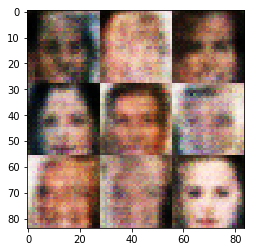

Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.5235
Epoch 1/1... Discriminator Loss: 0.8977... Generator Loss: 0.8246
Epoch 1/1... Discriminator Loss: 1.5535... Generator Loss: 0.3421
Epoch 1/1... Discriminator Loss: 0.8969... Generator Loss: 0.9868
Epoch 1/1... Discriminator Loss: 1.2981... Generator Loss: 0.4805
Epoch 1/1... Discriminator Loss: 1.0161... Generator Loss: 0.8315
Epoch 1/1... Discriminator Loss: 1.0443... Generator Loss: 1.0913
Epoch 1/1... Discriminator Loss: 0.9130... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.0771
Epoch 1/1... Discriminator Loss: 0.9682... Generator Loss: 0.9833


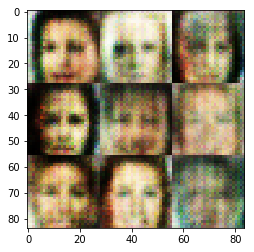

Epoch 1/1... Discriminator Loss: 1.1254... Generator Loss: 0.6165
Epoch 1/1... Discriminator Loss: 0.8538... Generator Loss: 0.9205
Epoch 1/1... Discriminator Loss: 1.0305... Generator Loss: 1.2974
Epoch 1/1... Discriminator Loss: 1.1846... Generator Loss: 0.6993
Epoch 1/1... Discriminator Loss: 1.3808... Generator Loss: 0.4893
Epoch 1/1... Discriminator Loss: 1.4548... Generator Loss: 0.4875
Epoch 1/1... Discriminator Loss: 0.9887... Generator Loss: 0.9267
Epoch 1/1... Discriminator Loss: 0.6673... Generator Loss: 1.1199
Epoch 1/1... Discriminator Loss: 1.0782... Generator Loss: 0.6175
Epoch 1/1... Discriminator Loss: 1.0385... Generator Loss: 0.6218


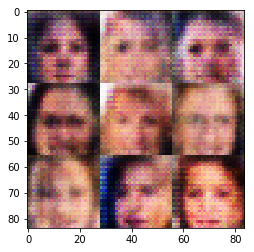

Epoch 1/1... Discriminator Loss: 1.0753... Generator Loss: 0.7910
Epoch 1/1... Discriminator Loss: 1.5053... Generator Loss: 0.5136
Epoch 1/1... Discriminator Loss: 0.5923... Generator Loss: 1.6058
Epoch 1/1... Discriminator Loss: 1.7229... Generator Loss: 0.3949
Epoch 1/1... Discriminator Loss: 1.0121... Generator Loss: 1.0980
Epoch 1/1... Discriminator Loss: 1.1189... Generator Loss: 0.7440
Epoch 1/1... Discriminator Loss: 1.2163... Generator Loss: 0.6315
Epoch 1/1... Discriminator Loss: 1.2744... Generator Loss: 0.7846
Epoch 1/1... Discriminator Loss: 0.9780... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 1.1466... Generator Loss: 0.5795


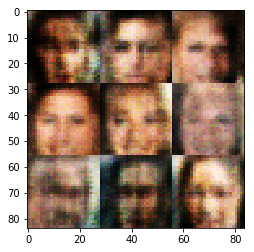

Epoch 1/1... Discriminator Loss: 1.5271... Generator Loss: 0.5542
Epoch 1/1... Discriminator Loss: 1.5841... Generator Loss: 0.5656
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 1.0040
Epoch 1/1... Discriminator Loss: 1.2274... Generator Loss: 0.8211
Epoch 1/1... Discriminator Loss: 0.9515... Generator Loss: 0.9014
Epoch 1/1... Discriminator Loss: 1.0136... Generator Loss: 1.2980
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.2992... Generator Loss: 0.7416
Epoch 1/1... Discriminator Loss: 1.0638... Generator Loss: 0.8455
Epoch 1/1... Discriminator Loss: 1.4223... Generator Loss: 0.6989


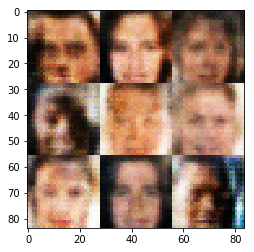

Epoch 1/1... Discriminator Loss: 1.2102... Generator Loss: 0.8562
Epoch 1/1... Discriminator Loss: 1.4730... Generator Loss: 0.6509
Epoch 1/1... Discriminator Loss: 0.7060... Generator Loss: 1.1297
Epoch 1/1... Discriminator Loss: 1.1187... Generator Loss: 0.8821
Epoch 1/1... Discriminator Loss: 1.4524... Generator Loss: 0.4512
Epoch 1/1... Discriminator Loss: 1.4530... Generator Loss: 0.4126
Epoch 1/1... Discriminator Loss: 1.2292... Generator Loss: 0.6480
Epoch 1/1... Discriminator Loss: 1.1350... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.1524... Generator Loss: 0.6928
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.8002


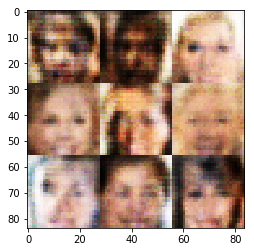

Epoch 1/1... Discriminator Loss: 1.2822... Generator Loss: 0.7474
Epoch 1/1... Discriminator Loss: 1.1416... Generator Loss: 0.8248
Epoch 1/1... Discriminator Loss: 1.2858... Generator Loss: 0.7290
Epoch 1/1... Discriminator Loss: 0.9044... Generator Loss: 1.0957
Epoch 1/1... Discriminator Loss: 1.0707... Generator Loss: 0.6734
Epoch 1/1... Discriminator Loss: 1.3265... Generator Loss: 0.7715
Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 0.7094
Epoch 1/1... Discriminator Loss: 1.1343... Generator Loss: 0.9738
Epoch 1/1... Discriminator Loss: 1.0546... Generator Loss: 0.8667
Epoch 1/1... Discriminator Loss: 1.1787... Generator Loss: 0.7345


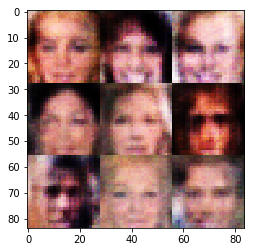

Epoch 1/1... Discriminator Loss: 1.0376... Generator Loss: 0.9292
Epoch 1/1... Discriminator Loss: 1.3259... Generator Loss: 0.7009
Epoch 1/1... Discriminator Loss: 1.2446... Generator Loss: 0.5727
Epoch 1/1... Discriminator Loss: 1.1857... Generator Loss: 0.7590
Epoch 1/1... Discriminator Loss: 1.2592... Generator Loss: 0.6473
Epoch 1/1... Discriminator Loss: 0.9516... Generator Loss: 1.0089
Epoch 1/1... Discriminator Loss: 1.1518... Generator Loss: 1.0270
Epoch 1/1... Discriminator Loss: 1.3465... Generator Loss: 0.7364
Epoch 1/1... Discriminator Loss: 1.0462... Generator Loss: 0.8360
Epoch 1/1... Discriminator Loss: 1.2863... Generator Loss: 0.6972


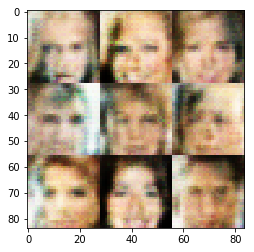

Epoch 1/1... Discriminator Loss: 1.2787... Generator Loss: 0.7001
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.0212... Generator Loss: 0.7659
Epoch 1/1... Discriminator Loss: 1.2279... Generator Loss: 0.6567
Epoch 1/1... Discriminator Loss: 1.0187... Generator Loss: 0.8225
Epoch 1/1... Discriminator Loss: 1.2964... Generator Loss: 0.8647
Epoch 1/1... Discriminator Loss: 1.3844... Generator Loss: 0.8696
Epoch 1/1... Discriminator Loss: 0.9630... Generator Loss: 1.0430
Epoch 1/1... Discriminator Loss: 1.2495... Generator Loss: 0.7356
Epoch 1/1... Discriminator Loss: 0.9731... Generator Loss: 0.9025


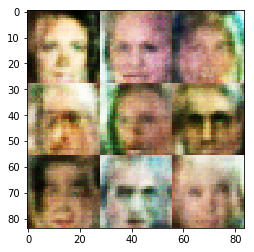

Epoch 1/1... Discriminator Loss: 1.1708... Generator Loss: 0.6532
Epoch 1/1... Discriminator Loss: 1.1207... Generator Loss: 0.8356
Epoch 1/1... Discriminator Loss: 1.0993... Generator Loss: 1.0008
Epoch 1/1... Discriminator Loss: 1.0440... Generator Loss: 1.1133
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.7282
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.6169
Epoch 1/1... Discriminator Loss: 1.1957... Generator Loss: 0.6648
Epoch 1/1... Discriminator Loss: 1.1827... Generator Loss: 0.6316
Epoch 1/1... Discriminator Loss: 1.1985... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 1.1180... Generator Loss: 0.7056


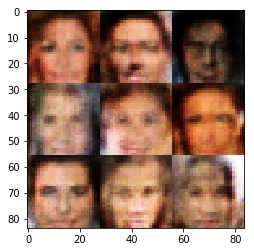

Epoch 1/1... Discriminator Loss: 1.1508... Generator Loss: 0.8080
Epoch 1/1... Discriminator Loss: 1.2113... Generator Loss: 0.7840
Epoch 1/1... Discriminator Loss: 1.2411... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.2425... Generator Loss: 0.6222
Epoch 1/1... Discriminator Loss: 1.1564... Generator Loss: 0.8129
Epoch 1/1... Discriminator Loss: 1.1812... Generator Loss: 0.7255
Epoch 1/1... Discriminator Loss: 1.0568... Generator Loss: 0.9568
Epoch 1/1... Discriminator Loss: 1.0766... Generator Loss: 0.8226
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 0.7923
Epoch 1/1... Discriminator Loss: 1.8566... Generator Loss: 0.2471


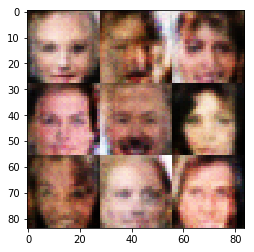

Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.9938
Epoch 1/1... Discriminator Loss: 1.1851... Generator Loss: 0.7943
Epoch 1/1... Discriminator Loss: 1.6868... Generator Loss: 0.4449
Epoch 1/1... Discriminator Loss: 1.1799... Generator Loss: 0.5159
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 1.1676
Epoch 1/1... Discriminator Loss: 1.1503... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.1585... Generator Loss: 1.0288
Epoch 1/1... Discriminator Loss: 1.3474... Generator Loss: 0.6918
Epoch 1/1... Discriminator Loss: 1.0169... Generator Loss: 0.6621
Epoch 1/1... Discriminator Loss: 1.1527... Generator Loss: 0.5726


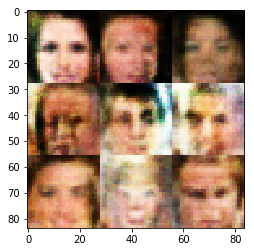

Epoch 1/1... Discriminator Loss: 1.3143... Generator Loss: 0.4961
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 0.8169
Epoch 1/1... Discriminator Loss: 1.4844... Generator Loss: 3.0027
Epoch 1/1... Discriminator Loss: 0.9619... Generator Loss: 1.0783
Epoch 1/1... Discriminator Loss: 1.2957... Generator Loss: 0.4940
Epoch 1/1... Discriminator Loss: 1.0307... Generator Loss: 0.6661
Epoch 1/1... Discriminator Loss: 1.1251... Generator Loss: 0.7136
Epoch 1/1... Discriminator Loss: 1.1914... Generator Loss: 0.8003
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 0.8041
Epoch 1/1... Discriminator Loss: 1.0812... Generator Loss: 0.6565


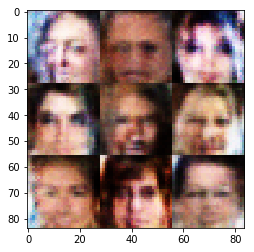

Epoch 1/1... Discriminator Loss: 1.3716... Generator Loss: 0.4794
Epoch 1/1... Discriminator Loss: 1.1275... Generator Loss: 0.7019
Epoch 1/1... Discriminator Loss: 0.8327... Generator Loss: 1.2541
Epoch 1/1... Discriminator Loss: 1.3263... Generator Loss: 0.4939
Epoch 1/1... Discriminator Loss: 0.8647... Generator Loss: 1.2849
Epoch 1/1... Discriminator Loss: 1.1290... Generator Loss: 0.7498
Epoch 1/1... Discriminator Loss: 1.1166... Generator Loss: 0.8084
Epoch 1/1... Discriminator Loss: 1.1059... Generator Loss: 0.7268
Epoch 1/1... Discriminator Loss: 0.8070... Generator Loss: 1.1366
Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.5058


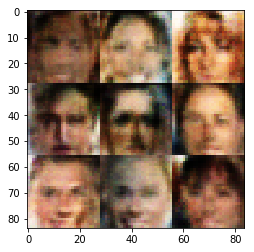

Epoch 1/1... Discriminator Loss: 1.3056... Generator Loss: 0.4664
Epoch 1/1... Discriminator Loss: 0.8860... Generator Loss: 0.9094
Epoch 1/1... Discriminator Loss: 1.1719... Generator Loss: 0.8079
Epoch 1/1... Discriminator Loss: 1.2626... Generator Loss: 0.6819
Epoch 1/1... Discriminator Loss: 1.0801... Generator Loss: 0.8436
Epoch 1/1... Discriminator Loss: 0.9752... Generator Loss: 1.0446
Epoch 1/1... Discriminator Loss: 0.9095... Generator Loss: 0.7537
Epoch 1/1... Discriminator Loss: 1.0891... Generator Loss: 0.6818
Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 1.1360
Epoch 1/1... Discriminator Loss: 1.0693... Generator Loss: 0.6123


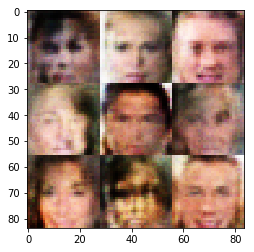

Epoch 1/1... Discriminator Loss: 1.0382... Generator Loss: 0.7809
Epoch 1/1... Discriminator Loss: 0.8842... Generator Loss: 0.9117
Epoch 1/1... Discriminator Loss: 1.1197... Generator Loss: 0.7804
Epoch 1/1... Discriminator Loss: 0.7632... Generator Loss: 1.4648
Epoch 1/1... Discriminator Loss: 1.5062... Generator Loss: 0.3702
Epoch 1/1... Discriminator Loss: 1.2541... Generator Loss: 0.5051
Epoch 1/1... Discriminator Loss: 1.7900... Generator Loss: 0.2417
Epoch 1/1... Discriminator Loss: 1.2261... Generator Loss: 0.7656
Epoch 1/1... Discriminator Loss: 1.1313... Generator Loss: 1.2808
Epoch 1/1... Discriminator Loss: 1.0880... Generator Loss: 1.0269


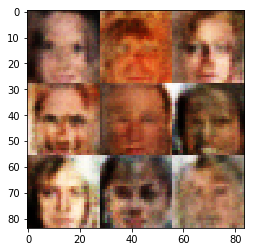

Epoch 1/1... Discriminator Loss: 1.0197... Generator Loss: 0.7811
Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 1.1231
Epoch 1/1... Discriminator Loss: 1.0467... Generator Loss: 0.6842
Epoch 1/1... Discriminator Loss: 1.1598... Generator Loss: 0.5867
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.5314
Epoch 1/1... Discriminator Loss: 1.1322... Generator Loss: 1.0943
Epoch 1/1... Discriminator Loss: 0.8261... Generator Loss: 1.5277
Epoch 1/1... Discriminator Loss: 1.1429... Generator Loss: 0.6003
Epoch 1/1... Discriminator Loss: 1.0650... Generator Loss: 0.6546
Epoch 1/1... Discriminator Loss: 1.2072... Generator Loss: 0.7561


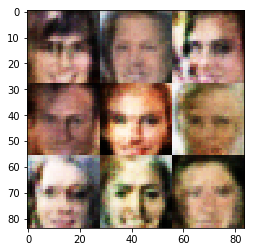

Epoch 1/1... Discriminator Loss: 0.8197... Generator Loss: 0.9430
Epoch 1/1... Discriminator Loss: 0.9168... Generator Loss: 0.8054
Epoch 1/1... Discriminator Loss: 1.2512... Generator Loss: 0.5930
Epoch 1/1... Discriminator Loss: 0.9426... Generator Loss: 1.0308
Epoch 1/1... Discriminator Loss: 0.8167... Generator Loss: 1.4660
Epoch 1/1... Discriminator Loss: 1.3603... Generator Loss: 0.6095
Epoch 1/1... Discriminator Loss: 1.2208... Generator Loss: 0.8571
Epoch 1/1... Discriminator Loss: 0.6609... Generator Loss: 1.4534
Epoch 1/1... Discriminator Loss: 0.7956... Generator Loss: 0.8643
Epoch 1/1... Discriminator Loss: 1.0887... Generator Loss: 0.9133


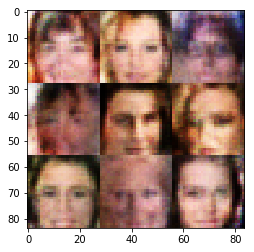

Epoch 1/1... Discriminator Loss: 0.8926... Generator Loss: 0.9047
Epoch 1/1... Discriminator Loss: 1.0421... Generator Loss: 0.7357
Epoch 1/1... Discriminator Loss: 0.8589... Generator Loss: 1.0564
Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 0.7969
Epoch 1/1... Discriminator Loss: 0.8245... Generator Loss: 0.9142
Epoch 1/1... Discriminator Loss: 1.0313... Generator Loss: 1.1525
Epoch 1/1... Discriminator Loss: 1.4000... Generator Loss: 0.3785
Epoch 1/1... Discriminator Loss: 1.0193... Generator Loss: 0.6503
Epoch 1/1... Discriminator Loss: 1.1837... Generator Loss: 0.6482
Epoch 1/1... Discriminator Loss: 0.9614... Generator Loss: 1.1618


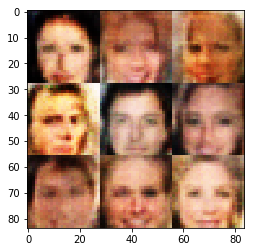

Epoch 1/1... Discriminator Loss: 1.1195... Generator Loss: 0.8349
Epoch 1/1... Discriminator Loss: 1.2373... Generator Loss: 0.6508
Epoch 1/1... Discriminator Loss: 1.0818... Generator Loss: 0.6919
Epoch 1/1... Discriminator Loss: 0.7357... Generator Loss: 1.2080
Epoch 1/1... Discriminator Loss: 1.1120... Generator Loss: 0.7606
Epoch 1/1... Discriminator Loss: 0.8809... Generator Loss: 0.8228
Epoch 1/1... Discriminator Loss: 1.1000... Generator Loss: 0.8918
Epoch 1/1... Discriminator Loss: 1.2594... Generator Loss: 0.4942
Epoch 1/1... Discriminator Loss: 1.0361... Generator Loss: 0.7752
Epoch 1/1... Discriminator Loss: 0.9522... Generator Loss: 1.0638


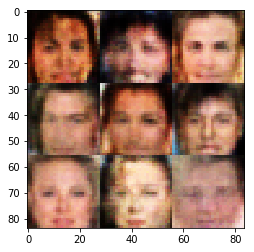

Epoch 1/1... Discriminator Loss: 0.5901... Generator Loss: 1.5208
Epoch 1/1... Discriminator Loss: 1.3014... Generator Loss: 0.5545
Epoch 1/1... Discriminator Loss: 1.0552... Generator Loss: 0.6728
Epoch 1/1... Discriminator Loss: 1.1480... Generator Loss: 0.7768
Epoch 1/1... Discriminator Loss: 1.2694... Generator Loss: 0.6536
Epoch 1/1... Discriminator Loss: 1.4804... Generator Loss: 0.5746
Epoch 1/1... Discriminator Loss: 0.8348... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.1134... Generator Loss: 0.7475
Epoch 1/1... Discriminator Loss: 0.8810... Generator Loss: 0.8927
Epoch 1/1... Discriminator Loss: 1.1291... Generator Loss: 0.6780


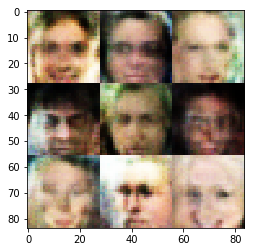

Epoch 1/1... Discriminator Loss: 1.1020... Generator Loss: 0.5507
Epoch 1/1... Discriminator Loss: 0.8303... Generator Loss: 1.2829
Epoch 1/1... Discriminator Loss: 0.7694... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 1.0713
Epoch 1/1... Discriminator Loss: 1.0729... Generator Loss: 0.6809
Epoch 1/1... Discriminator Loss: 1.1181... Generator Loss: 0.7227
Epoch 1/1... Discriminator Loss: 1.3266... Generator Loss: 0.5787
Epoch 1/1... Discriminator Loss: 1.2661... Generator Loss: 0.7162
Epoch 1/1... Discriminator Loss: 0.7314... Generator Loss: 1.2848
Epoch 1/1... Discriminator Loss: 0.7525... Generator Loss: 1.6161


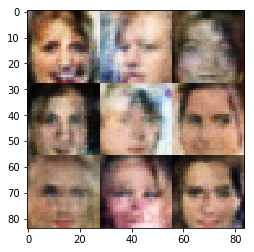

Epoch 1/1... Discriminator Loss: 1.2685... Generator Loss: 0.5418
Epoch 1/1... Discriminator Loss: 0.6766... Generator Loss: 1.9068
Epoch 1/1... Discriminator Loss: 0.9053... Generator Loss: 1.1046
Epoch 1/1... Discriminator Loss: 1.1829... Generator Loss: 0.5590
Epoch 1/1... Discriminator Loss: 1.1152... Generator Loss: 0.7090
Epoch 1/1... Discriminator Loss: 0.8909... Generator Loss: 1.4652
Epoch 1/1... Discriminator Loss: 1.1386... Generator Loss: 0.5672
Epoch 1/1... Discriminator Loss: 1.1115... Generator Loss: 0.6000
Epoch 1/1... Discriminator Loss: 1.8358... Generator Loss: 0.2251
Epoch 1/1... Discriminator Loss: 0.9792... Generator Loss: 0.6850


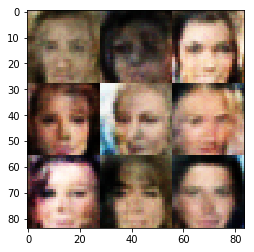

Epoch 1/1... Discriminator Loss: 0.9976... Generator Loss: 0.8229
Epoch 1/1... Discriminator Loss: 0.8002... Generator Loss: 1.2265
Epoch 1/1... Discriminator Loss: 0.5914... Generator Loss: 1.3106
Epoch 1/1... Discriminator Loss: 2.0572... Generator Loss: 0.2009
Epoch 1/1... Discriminator Loss: 1.5647... Generator Loss: 0.2933
Epoch 1/1... Discriminator Loss: 0.8943... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 1.1589... Generator Loss: 0.6902
Epoch 1/1... Discriminator Loss: 1.1216... Generator Loss: 0.7468
Epoch 1/1... Discriminator Loss: 0.7504... Generator Loss: 1.2171
Epoch 1/1... Discriminator Loss: 0.9607... Generator Loss: 1.7254


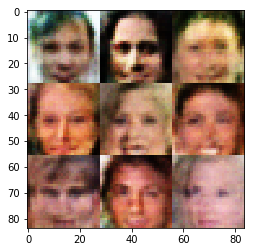

Epoch 1/1... Discriminator Loss: 0.8558... Generator Loss: 0.8202
Epoch 1/1... Discriminator Loss: 0.9461... Generator Loss: 0.7687
Epoch 1/1... Discriminator Loss: 0.6843... Generator Loss: 3.6310
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 0.7076
Epoch 1/1... Discriminator Loss: 0.7935... Generator Loss: 1.3369
Epoch 1/1... Discriminator Loss: 0.7287... Generator Loss: 1.1279
Epoch 1/1... Discriminator Loss: 0.5564... Generator Loss: 1.1654
Epoch 1/1... Discriminator Loss: 0.7711... Generator Loss: 2.5792
Epoch 1/1... Discriminator Loss: 0.7652... Generator Loss: 0.9366
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 0.8235


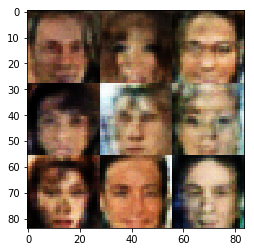

Epoch 1/1... Discriminator Loss: 1.2176... Generator Loss: 0.5233
Epoch 1/1... Discriminator Loss: 0.8777... Generator Loss: 0.9687
Epoch 1/1... Discriminator Loss: 0.5735... Generator Loss: 1.4810
Epoch 1/1... Discriminator Loss: 0.6117... Generator Loss: 1.7452
Epoch 1/1... Discriminator Loss: 0.8701... Generator Loss: 1.0526
Epoch 1/1... Discriminator Loss: 1.1381... Generator Loss: 0.6481
Epoch 1/1... Discriminator Loss: 0.6610... Generator Loss: 1.4170
Epoch 1/1... Discriminator Loss: 1.3100... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 0.6295... Generator Loss: 2.5155
Epoch 1/1... Discriminator Loss: 1.1895... Generator Loss: 0.8551


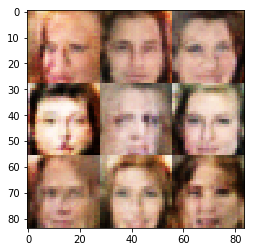

Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 2.0404
Epoch 1/1... Discriminator Loss: 1.5341... Generator Loss: 0.5243
Epoch 1/1... Discriminator Loss: 0.7476... Generator Loss: 1.3601
Epoch 1/1... Discriminator Loss: 0.9560... Generator Loss: 1.1129
Epoch 1/1... Discriminator Loss: 1.1662... Generator Loss: 0.5956
Epoch 1/1... Discriminator Loss: 1.2514... Generator Loss: 0.4795
Epoch 1/1... Discriminator Loss: 0.9668... Generator Loss: 0.8850
Epoch 1/1... Discriminator Loss: 1.4650... Generator Loss: 0.3349
Epoch 1/1... Discriminator Loss: 1.8034... Generator Loss: 0.2678
Epoch 1/1... Discriminator Loss: 1.1630... Generator Loss: 0.6189


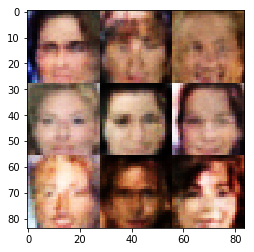

Epoch 1/1... Discriminator Loss: 1.8666... Generator Loss: 0.2268
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 0.7492
Epoch 1/1... Discriminator Loss: 2.1067... Generator Loss: 0.1745
Epoch 1/1... Discriminator Loss: 1.2068... Generator Loss: 0.5815
Epoch 1/1... Discriminator Loss: 1.2986... Generator Loss: 0.7127
Epoch 1/1... Discriminator Loss: 0.8513... Generator Loss: 0.9342
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 0.5241
Epoch 1/1... Discriminator Loss: 1.2184... Generator Loss: 0.5043
Epoch 1/1... Discriminator Loss: 1.2099... Generator Loss: 0.5658
Epoch 1/1... Discriminator Loss: 1.4644... Generator Loss: 0.3648


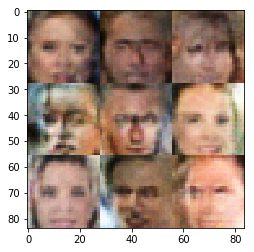

Epoch 1/1... Discriminator Loss: 0.6934... Generator Loss: 1.1094
Epoch 1/1... Discriminator Loss: 0.7800... Generator Loss: 1.8035
Epoch 1/1... Discriminator Loss: 1.0094... Generator Loss: 1.4384
Epoch 1/1... Discriminator Loss: 1.5380... Generator Loss: 0.3333
Epoch 1/1... Discriminator Loss: 1.4264... Generator Loss: 0.3777
Epoch 1/1... Discriminator Loss: 0.6601... Generator Loss: 1.3287
Epoch 1/1... Discriminator Loss: 1.5675... Generator Loss: 0.3982
Epoch 1/1... Discriminator Loss: 1.2331... Generator Loss: 0.6457
Epoch 1/1... Discriminator Loss: 0.6835... Generator Loss: 1.1888
Epoch 1/1... Discriminator Loss: 1.0029... Generator Loss: 0.9255


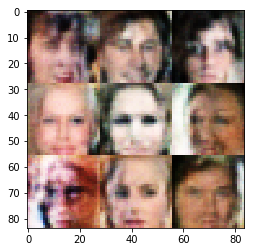

Epoch 1/1... Discriminator Loss: 0.9694... Generator Loss: 1.0448
Epoch 1/1... Discriminator Loss: 0.7001... Generator Loss: 2.2190
Epoch 1/1... Discriminator Loss: 1.1034... Generator Loss: 0.5837
Epoch 1/1... Discriminator Loss: 0.4627... Generator Loss: 2.3276
Epoch 1/1... Discriminator Loss: 1.0058... Generator Loss: 1.0085
Epoch 1/1... Discriminator Loss: 0.5963... Generator Loss: 2.0843
Epoch 1/1... Discriminator Loss: 2.0817... Generator Loss: 0.1810
Epoch 1/1... Discriminator Loss: 1.1199... Generator Loss: 1.1548
Epoch 1/1... Discriminator Loss: 0.6804... Generator Loss: 1.7708
Epoch 1/1... Discriminator Loss: 1.1641... Generator Loss: 0.6230


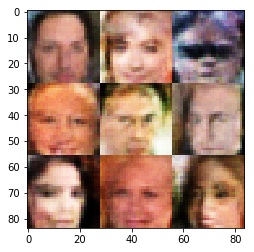

Epoch 1/1... Discriminator Loss: 0.8791... Generator Loss: 1.3236
Epoch 1/1... Discriminator Loss: 0.9207... Generator Loss: 1.6253
Epoch 1/1... Discriminator Loss: 0.9740... Generator Loss: 1.0014
Epoch 1/1... Discriminator Loss: 0.9196... Generator Loss: 1.1090
Epoch 1/1... Discriminator Loss: 1.1491... Generator Loss: 0.6175
Epoch 1/1... Discriminator Loss: 0.9548... Generator Loss: 0.8227
Epoch 1/1... Discriminator Loss: 1.0884... Generator Loss: 0.7566
Epoch 1/1... Discriminator Loss: 1.3363... Generator Loss: 0.5374
Epoch 1/1... Discriminator Loss: 1.6883... Generator Loss: 0.2811
Epoch 1/1... Discriminator Loss: 0.9012... Generator Loss: 1.1178


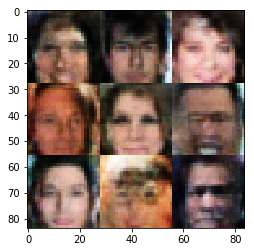

Epoch 1/1... Discriminator Loss: 1.7113... Generator Loss: 0.3211
Epoch 1/1... Discriminator Loss: 1.0114... Generator Loss: 1.0063
Epoch 1/1... Discriminator Loss: 0.8006... Generator Loss: 1.3201
Epoch 1/1... Discriminator Loss: 0.6910... Generator Loss: 1.0144
Epoch 1/1... Discriminator Loss: 0.8206... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 1.2505... Generator Loss: 0.4570
Epoch 1/1... Discriminator Loss: 1.1236... Generator Loss: 0.7634
Epoch 1/1... Discriminator Loss: 0.7143... Generator Loss: 1.6415
Epoch 1/1... Discriminator Loss: 1.1071... Generator Loss: 1.0522
Epoch 1/1... Discriminator Loss: 1.4880... Generator Loss: 0.3808


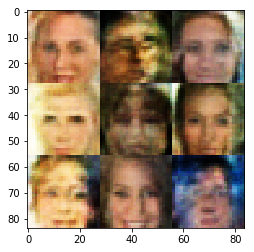

Epoch 1/1... Discriminator Loss: 0.8238... Generator Loss: 0.9109
Epoch 1/1... Discriminator Loss: 1.0807... Generator Loss: 0.6935
Epoch 1/1... Discriminator Loss: 1.4684... Generator Loss: 0.4052
Epoch 1/1... Discriminator Loss: 1.1349... Generator Loss: 0.6463
Epoch 1/1... Discriminator Loss: 1.5751... Generator Loss: 0.4768
Epoch 1/1... Discriminator Loss: 0.7960... Generator Loss: 1.1788
Epoch 1/1... Discriminator Loss: 0.8231... Generator Loss: 1.3326
Epoch 1/1... Discriminator Loss: 1.2877... Generator Loss: 0.5107
Epoch 1/1... Discriminator Loss: 1.0696... Generator Loss: 0.7330
Epoch 1/1... Discriminator Loss: 0.7614... Generator Loss: 0.9622


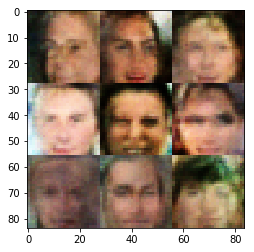

Epoch 1/1... Discriminator Loss: 1.2888... Generator Loss: 0.5620
Epoch 1/1... Discriminator Loss: 0.9152... Generator Loss: 0.7973
Epoch 1/1... Discriminator Loss: 1.2059... Generator Loss: 0.5997


KeyboardInterrupt: 

In [82]:
batch_size = 32
z_dim = 100
learning_rate = 0.0001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.